## Task 1 solution

For the position calculations, we have:




> Base at (0,0)

> Elbow joint (x1, y1) at (l1 cos(q1), l1 sin(q1))

> End effector (x, y) at (l1 cos(q1) + l2 cos(q1 + q2),  l1 sin(q1) + l2 sin(q1 + q2))

So for differenct configurations like,

*  Straight Arm

    - (q1=0°, q2=0°)


    - Elbow : x1 = 1cos(0) =1, y1 =1sin(0) = 0


    - End-Effector: x = 1cos(0) + 1cos(0) = 2, y = 1sin(0) + 1sin(0) = 0

* Bent Elbow

  - (q1=45°, q2=90°)

  - Elbow: x1 = 0.707, y1 = 0.707

  - End-Effector: x = cos(45) + cos(135) = 0, y = sin(45) + sin(135) = 1.414

* Folded Arm

  - (q1 = 0, q2 = 180)

  - Elbow: x1 = 1, y1 = 0
  - End-Effector: x = cos(0) + cos(180) = 0, y = sin(0) + sin(180) = 0

## Task 2 solution

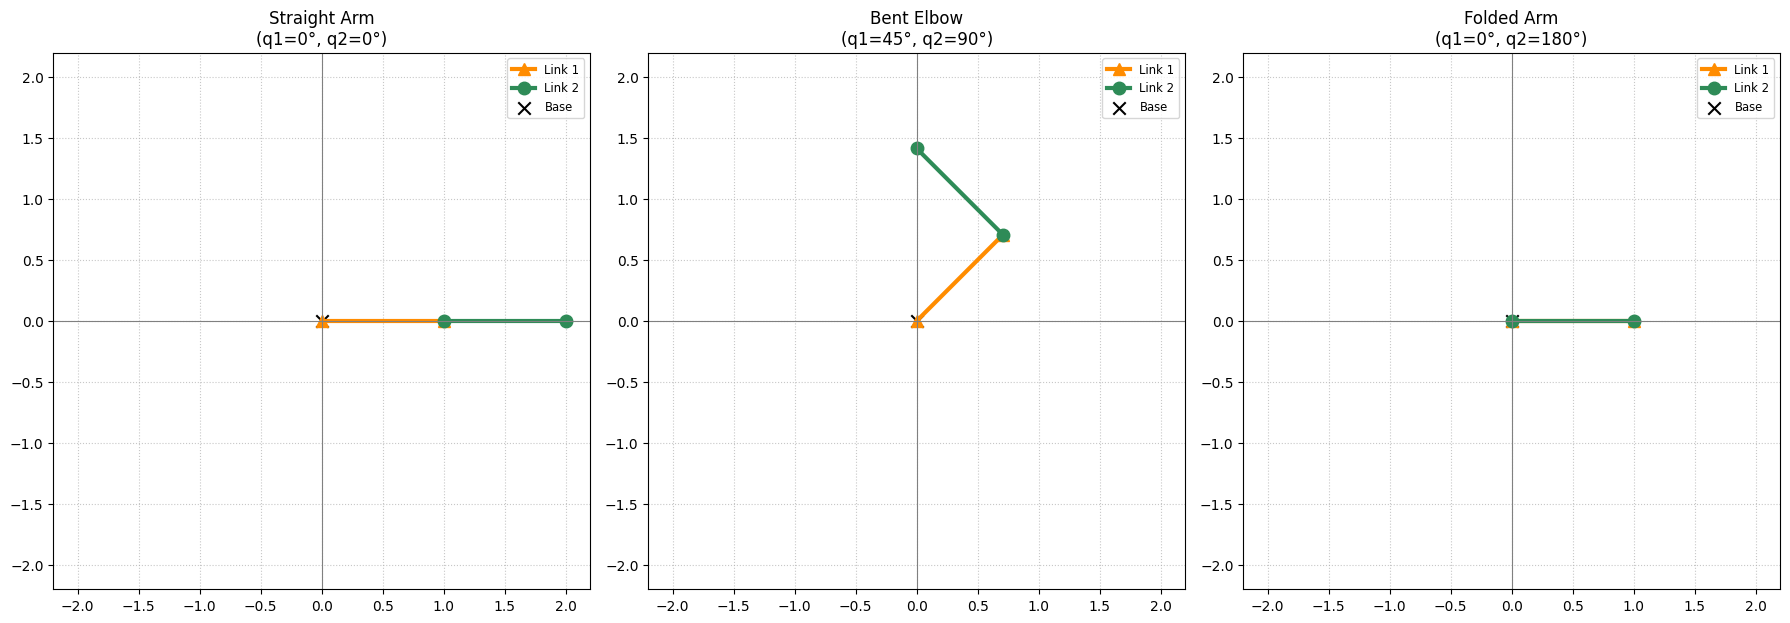

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Link lengths
l1 = 1
l2 = 1

def plot_robotic_arm(q1_deg, q2_deg, ax, title):
    # Convert degrees to radians
    q1 = np.radians(q1_deg)
    q2 = np.radians(q2_deg)

    # Joint positions
    x0, y0 = 0, 0
    x1 = l1 * np.cos(q1)
    y1 = l1 * np.sin(q1)
    x2 = x1 + l2 * np.cos(q1 + q2)
    y2 = y1 + l2 * np.sin(q1 + q2)

    # Plot links
    ax.plot([x0, x1], [y0, y1],
            color='darkorange', linewidth=3, marker='^',
            markersize=9, label='Link 1')

    ax.plot([x1, x2], [y1, y2],
            color='seagreen', linewidth=3, marker='o',
            markersize=9, label='Link 2')

    # Plot base
    ax.scatter(0, 0, color='black', s=80, marker='x', label='Base')

    # Formatting
    ax.set_title(f"{title}\n(q1={q1_deg}°, q2={q2_deg}°)", fontsize=12)
    ax.set_xlim(-2.2, 2.2)
    ax.set_ylim(-2.2, 2.2)
    ax.set_aspect('equal')
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.axhline(0, color='gray', lw=0.8)
    ax.axvline(0, color='gray', lw=0.8)
    ax.legend(fontsize='small')


# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Configurations
plot_robotic_arm(0, 0, axs[0], "Straight Arm")
plot_robotic_arm(45, 90, axs[1], "Bent Elbow")
plot_robotic_arm(0, 180, axs[2], "Folded Arm")

plt.tight_layout()
plt.show()


#Analysis of Arm Position and Workspace

The motion of the two-link planar robotic arm depends on the joint angles q1 and q2. These angles decide the position of the elbow joint and the end effector in the Cartesian plane.

##Effect of Joint Angles

* Joint angle q1:
This angle rotates the whole arm around the base fixed at the origin. Changing q1 changes the direction in which the arm points, moving it along a circular path around the origin.

* Joint angle q2:
This angle controls how the second link moves relative to the first link. It mainly affects how stretched or folded the arm is.
  - When q2 = 0°, the arm is completely straight and reaches its maximum distance from the origin.
  - When q2 = 180°, the arm folds back, bringing the end effector close to the base.

##Workspace Analysis

Since both links have the same length (l1 = l2 = 1), the maximum reach of the arm is 2 units. The set of all points that the end effector can reach forms a circular area centered at the origin with radius 2. Because the links are equal in length, the arm can reach any point inside this circular region, including the origin.
